# Модуляция
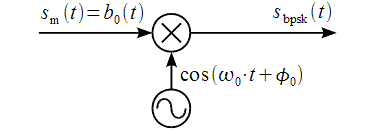

In [1]:
from numpy import(linspace)
import numpy as np
import math 
import matplotlib.pyplot as plt
from matplotlib.pyplot import (plot, yscale, scatter)
from scipy import signal
from scipy.special import erf
import time

STNR=0# Уровень шума в Дб
stnr=0# Уровень шума в разах
n=10000# Колличество бит в посылке
X=np.random.random_integers(0,1,n)# Создаем массив данных
X1=np.zeros(n)
number_of_points=20 #колличество точек на 1 символ
S = np.zeros(n*number_of_points) # Для модулированного сигнала
S1 = np.zeros(n*number_of_points)# Для демодулированного сигнала
elementary_signal_period=3 #колличество периодов на 1 символ
carrier_frequency=1 #множитель частоты
k1 = elementary_signal_period/(number_of_points)
X2=np.zeros(n, dtype = int)
fails=0
a=0

for i in range(n):
    if X[i]==0:
        X1[i]=-1
    else:
        X1[i]=1
for i in range(n):
    for t in range(number_of_points):
        S[i*number_of_points+t] = (X1[i]*math.sin(2*math.pi*carrier_frequency*t*k1))

E0=0
for i in range(number_of_points):
    E0+=S[i]*S[i]

# print("Eb=",E0)
# N=math.sqrt(E0/(2*10**(STNR/10)))
# print("N= ", N)
# print(S)
# plt.plot(S)
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  del sys.path[0]


In [2]:
def phi(x):# Функция для расчета вероятности ошибок 
    return((math.erfc(x / math.sqrt(2.0)))/ 2.0)
def BPSK(local_STNR):
    global S
    for i in range(n):
        if X[i]==0:
            X1[i]=-1
        else:
            X1[i]=1
    for i in range(n):
        for t in range(number_of_points):
            S[i*number_of_points+t] = (X1[i]*math.sin(2*math.pi*carrier_frequency*t*k1))
    N=math.sqrt(E0/(2*10**(local_STNR/10)))
    noise = np.random.normal(0,N,S.size)
    S+=noise
    for i in range(S.size):
        S1[i]=S[i]*(-1)*math.sin(2*math.pi*carrier_frequency*i*k1) 
    for i in range(n):
        a=0
        for j in range(number_of_points):
            a+=S1[j+number_of_points*i]
        X2[i]=int(a)
        if X2[i]<0:
            X2[i]=1
        else:
            X2[i]=0
    fails=0
    for i in range(X.size):
        if X[i]!=X2[i]:
            fails+=1
    return(fails/n)
#     start = time.monotonic()
#     end = time.monotonic()
#     print(end-start)

# Добавление шума

In [3]:
# noise = np.random.normal(0,N,S.size)
# S+=noise

# plt.plot(noise)
# plt.show()
# print("Дисперсия шума: ",np.var(noise))# Дисперсия шума
# print(phi(math.sqrt(2*E0/(np.var(noise)))))

# Демодуляция

In [4]:
# for i in range(S.size):
#     S1=np.append(S1, S[i]*(-1)*math.sin(2*math.pi*carrier_frequency*i*k1))
# plt.plot(S1)
# plt.grid()
# plt.show()
# plt.plot(freq, abs(np.fft.fft(S1)))
# plt.grid()
# plt.show()

# Декодирование

In [5]:
# for i in range(n):
#     a=0
#     for j in range(number_of_points):
#         a+=S1[j+number_of_points*i]
#     X2[i]=int(a)
#     if X2[i]<0:
#         X2[i]=1
#     else:
#         X2[i]=0
# print("Принято ",X2.size)

# Проверка на ошибки

In [6]:
# for i in range(X.size):
#     if X[i]!=X2[i]:
#         fails+=1
# print(fails,"ошибок")
# print("Теоретическая вероятность ошибки: ", phi(math.sqrt(E0/(N*N))))
# print("Практическая вероятность ошибки: ", fails/n)

0.2132280183576204 0.2155
0.18611381748338907 0.1845
0.15836831880959792 0.1613
0.13064448852282923 0.131
0.10375909595340632 0.1029
0.07864960352514255 0.0791
0.05628195197654146 0.0612
0.03750612835892598 0.0378
0.022878407561085338 0.0255
0.012500818040737565 0.0148
0.0059538671477786615 0.0073
0.002388290780932807 0.003
0.0007726748153784444 0.0012900000000000001
0.00019090777407599314 0.00033499999999999996
3.362722841961758e-05 9.500000000000002e-05
последний 3.872108215522049e-06 1.266666666666666e-05


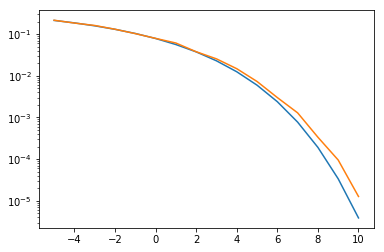

In [7]:
mass_STNR_theor = np.array([])
mass_STNR_pract = np.array([])
for STNR in range (12):
    stnr=10**((STNR-5)/10)# Считаю ОСШ в разах для функции ошибок 
    mass_STNR_theor=np.append(mass_STNR_theor, phi(math.sqrt(2*stnr)))# Теория
    mass_STNR_pract=np.append(mass_STNR_pract, BPSK(STNR-5))# Практика; STNR-это ОСШ в Дб
    print(mass_STNR_theor[STNR], mass_STNR_pract[STNR])
for STNR in range (12,15,1):
    a=0
    for j in range (20):
        a+=BPSK(STNR-5)
    stnr=10**((STNR-5)/10)# Считаю ОСШ в разах для функции ошибок
    mass_STNR_theor=np.append(mass_STNR_theor, phi(math.sqrt(2*stnr)))# Теория
    mass_STNR_pract=np.append(mass_STNR_pract, a/20)
    print(mass_STNR_theor[STNR], mass_STNR_pract[STNR])
a=0
for j in range (500):
    a+=BPSK(10)
stnr=10**((10)/10)
mass_STNR_theor=np.append(mass_STNR_theor, phi(math.sqrt(2*stnr)))# Теория
mass_STNR_pract=np.append(mass_STNR_pract, a/500)
print("последний", mass_STNR_theor[15], mass_STNR_pract[15])

x=linspace(-5,10,16)
yscale('log')
plot(x, mass_STNR_theor)
plot(x, mass_STNR_pract)